# Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from experiments.util import load_data

ModuleNotFoundError: No module named 'experiments'

### Load data

In [4]:
X_data, y_data = load_data()

In [5]:
print(type(X_data), X_data.shape)
print(type(y_data), y_data.shape)

<class 'numpy.ndarray'> (50000, 32, 32, 3)
<class 'numpy.ndarray'> (50000,)


The training data consists of 50000 images. Each image is represented by 32x32 pixels with 3 channels for the colours (RGB). To get an idea of what the data consists of, we reshape X_data into a 2-d matrix and use the pandas describe() function.

In [9]:
pd.DataFrame(X_data.reshape(-1, 32 * 32 * 3)).describe()

0            1             2            3             4     \
count  50000.000000  50000.00000  50000.000000  50000.00000  50000.000000   
mean     130.710740    136.05614    132.553800    130.14036    135.442380   
std       73.412873     72.90798     80.449751     72.44259     71.901316   
min        0.000000      0.00000      0.000000      0.00000      0.000000   
25%       71.000000     77.00000     61.000000     71.00000     78.000000   
50%      128.000000    135.00000    127.000000    127.00000    135.000000   
75%      189.000000    195.00000    207.000000    188.00000    193.000000   
max      255.000000    255.00000    255.000000    255.00000    255.000000   

               5             6            7             8             9     \
count  50000.000000  50000.000000  50000.00000  50000.000000  50000.000000   
mean     131.853580    131.050440    136.24616    132.581440    131.568860   
std       79.598048     72.240546     71.67471     79.434675     72.016555   
min        0.000000      0.000000      0.00000      0.000000      0.000000   
25%       61.000000     73.000000     79.00000     62.000000     73.000000   
50%      127.000000    129.000000    136.00000    128.000000    130.000000   
75%      206.000000    188.000000    194.00000    206.000000    188.000000   
max      255.000000    255.000000    255.00000    255.000000    255.000000   

       ...          3062          3063          3064          3065  \
count  ...  50000.000000  50000.000000  50000.000000  50000.000000   
mean   ...    113.877800    126.778360    125.697080    113.830580   
std    ...     64.738943     63.954763     61.591233     64.894603   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...     64.000000     79.000000     81.000000     64.000000   
50%    ...    106.000000    124.000000    123.000000    106.000000   
75%    ...    157.000000    172.000000    167.000000    157.000000   
max    ...    255.000000    255.000000    255.000000    255.000000   

               3066          3067          3068          3069          3070  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean     126.564960    125.617420    113.906240    126.639080    125.850300   
std       64.178427     61.831646     65.212671     64.926283     62.649286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       79.000000     81.000000     64.000000     78.000000     80.000000   
50%      124.000000    123.000000    106.000000    124.000000    123.000000   
75%      172.000000    167.000000    157.000000    172.000000    168.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

               3071  
count  50000.000000  
mean     114.381860  
std       66.077526  
min        0.000000  
25%       63.000000  
50%      106.000000  
75%      158.000000  
max      255.000000  

[8 rows x 3072 columns]

### Plot a selection of the images

We randomly select 100 images. We plot them and show their respective class labels.

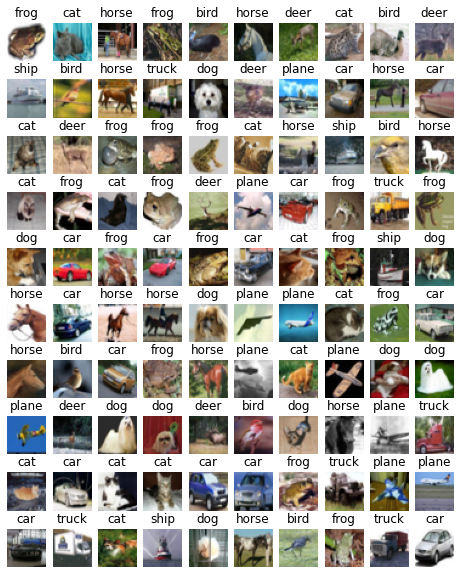

In [8]:
fig = plt.figure(figsize=(10., 10.))

grid = ImageGrid(fig, 111,
    nrows_ncols=(10, 10),
    axes_pad=(0.1, 0.25),
)

idx = np.arange(y_data.size)
np.random.shuffle(idx)

for ax, im, label in zip(grid, X_data[idx], y_data[idx].flat):
    ax.set_title(label)
    ax.axis('off')
    ax.imshow(im)

plt.show()

To get a better impression of the different classes, we select 100 images from each class and plot them.

/usr/lib/python3/dist-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


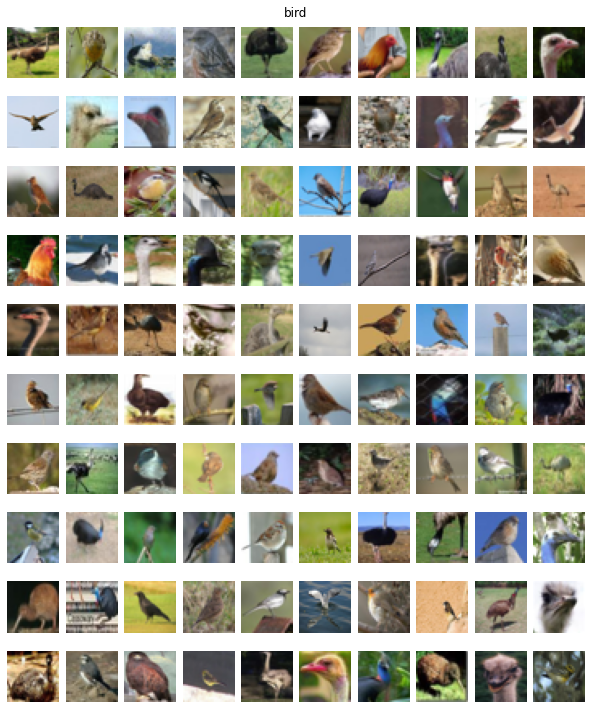

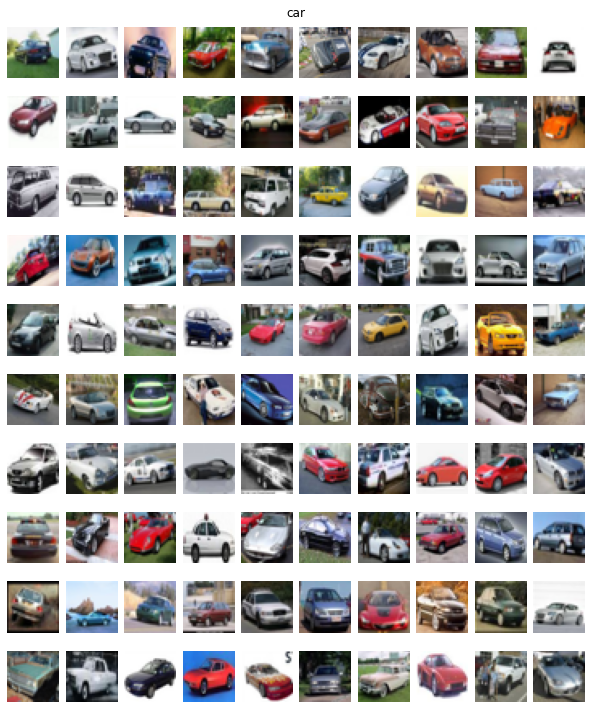

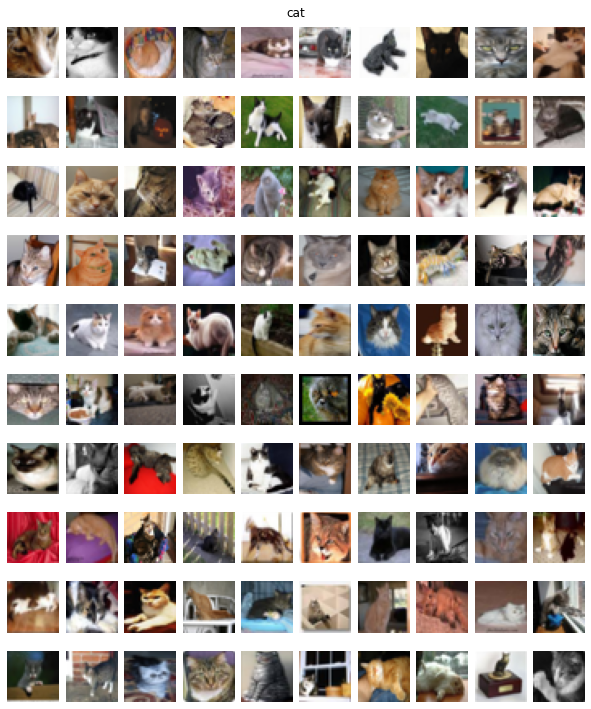

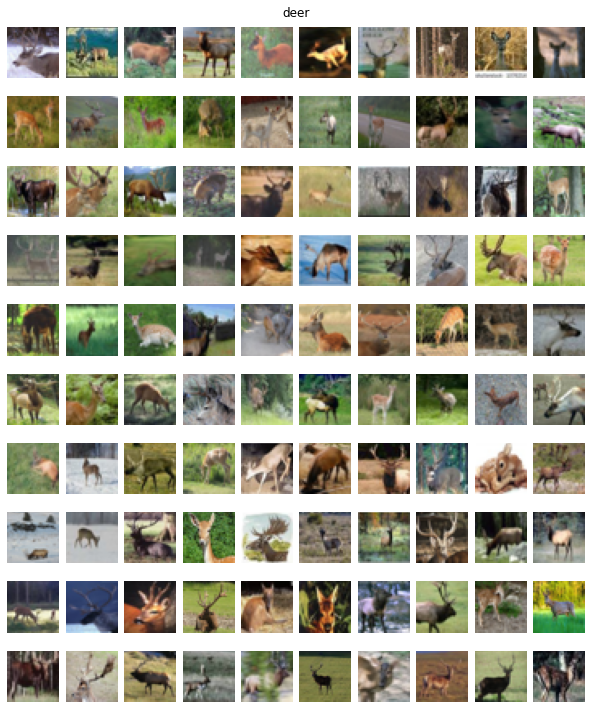

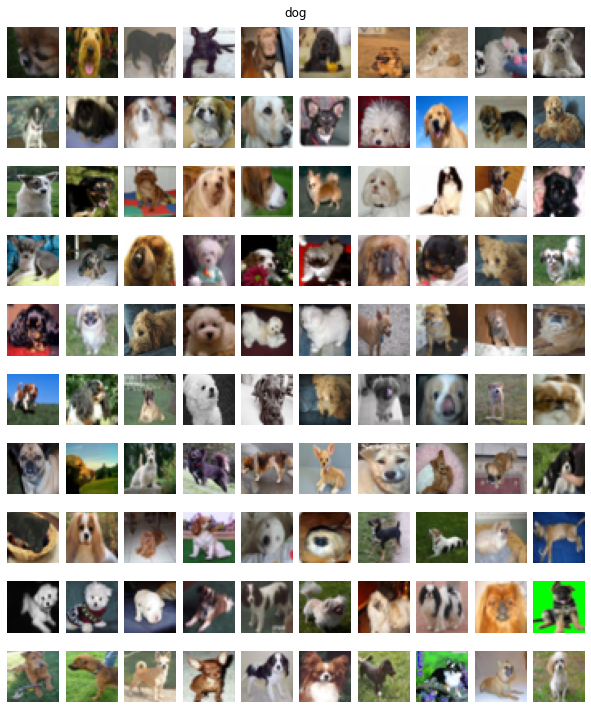

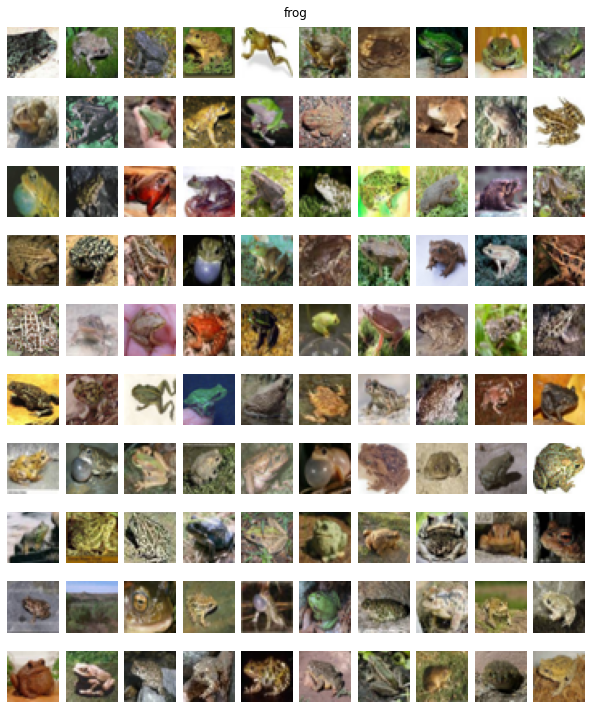

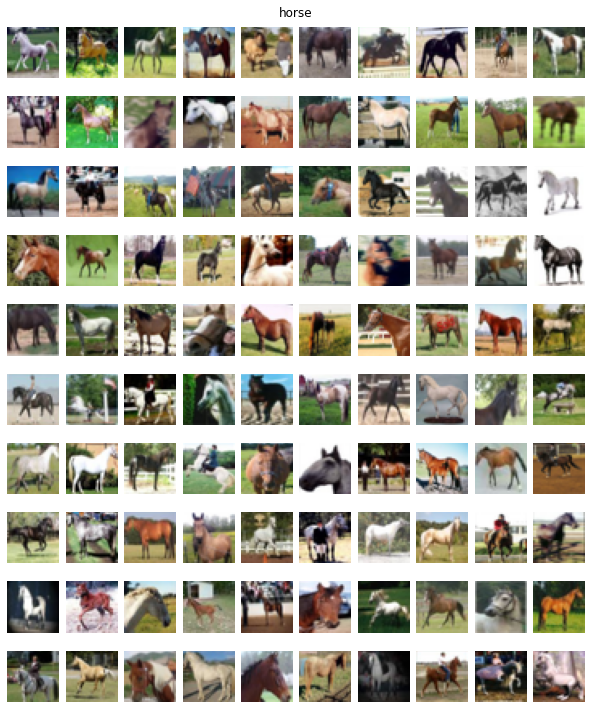

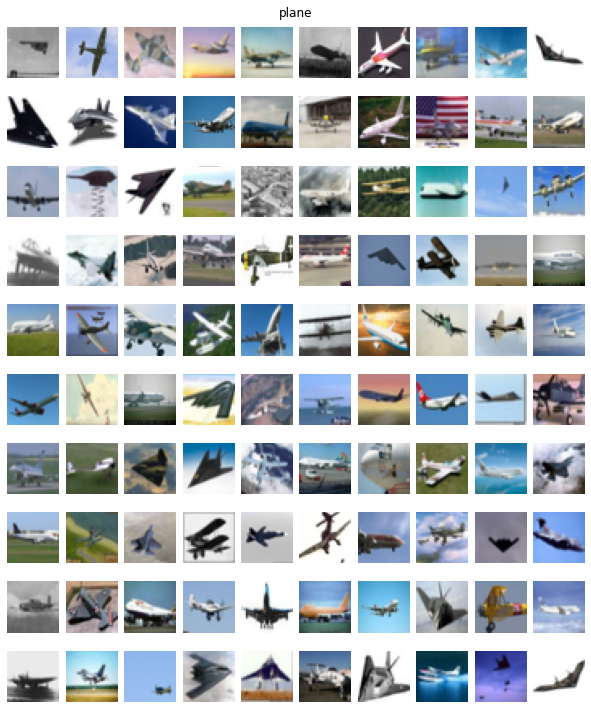

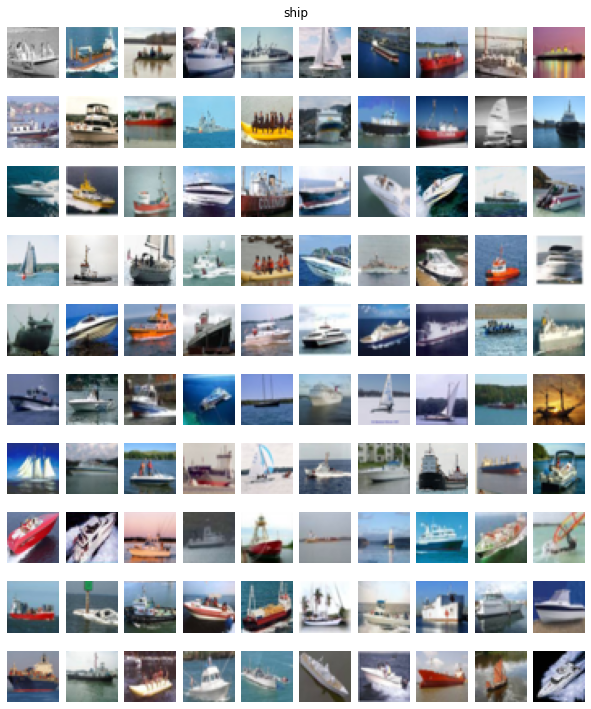

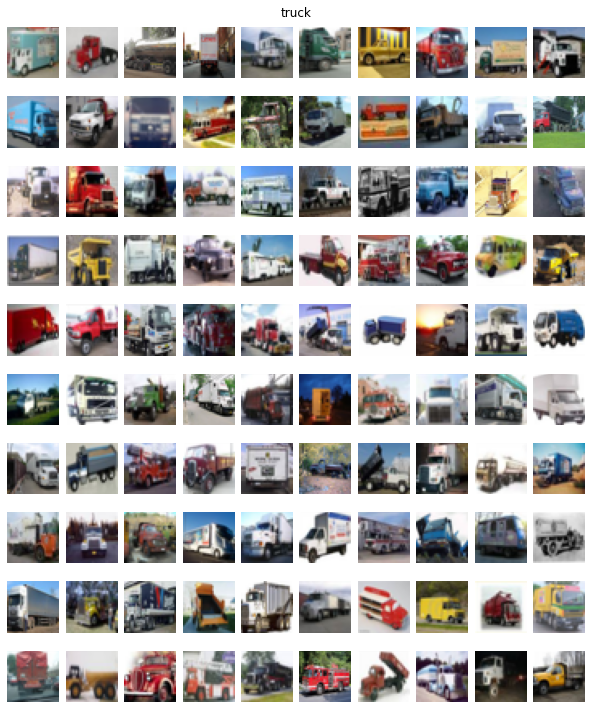

In [9]:
for category in np.unique(y_data):
    fig = plt.figure(figsize=(10., 10.))

    grid = ImageGrid(fig, 111,
        nrows_ncols=(10, 10),
        axes_pad=(0.1, 0.25),
    )
    fig.suptitle(category)

    X_data_cat = X_data[y_data == category, :, :, :]
    y_data_cat = y_data[y_data == category]

    idx = np.arange(y_data_cat.size)
    np.random.shuffle(idx)

    for ax, im, label in zip(grid, X_data_cat[idx], y_data_cat[idx]):
        ax.axis('off')
        ax.imshow(im)

    plt.tight_layout()
    plt.show()

Class balance is an important aspect for classification. Therefore, we confirm that the classes are balanced, as claimed in the description of cifar10.

<AxesSubplot:ylabel='count'>

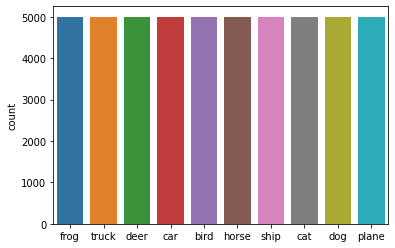

In [11]:
sn.countplot(x=y_data)

Fortunately, the classes are balanced so we do not have to worry about this.